<a href="https://colab.research.google.com/github/Mark-maker/HackerEarth-Tag_Prediction/blob/master/HackerEarth_Tag_Recommendation_in_sync_with_StackOverflowTagPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""Load Libraries and install necessary python packages"""

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import re, string, unicodedata
from bs4 import BeautifulSoup
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer



#os.getcwd()           To read current working directory
#os.chdir(file_path)   To set working directory


# import sys
# !conda install --yes --prefix {sys.prefix} textblob
# import sys
# !{sys.executable} -m pip install wordcloud

In [0]:
#file_path='E:\\DSA Internship\\TagRecommendationSystem\\Data\\'
data=pd.read_csv('/train.csv') #Input the path of the data file


In [0]:
"""Add a column tag_count which shows the no. of tags in each row"""
data['tags']=data['tags'].apply(lambda x: "|".join(word for word in str(x).split('|') if not word=='nan'))

data['tag_count']=data['tags'].apply(lambda x: len(str(x).split('|')))
print(data.head())

           id                                              title  \
0  HE-ece4370  Check requests to server from the application ...   
1  HE-fad0d3b                  Using Asc offset and desc in psql   
2  HE-ea00013  What to do when you have much permissions with...   
3  HE-df1304d                   React remove component from list   
4  HE-e946f8c                      RPC with promises for node.js   

                                             article  \
0  <p>Is there a way to find what sort of request...   
1  <p>This code produces this</p>\r\r\r\r\n\r\r\r...   
2  <p>I'm planning to use a binary system to hand...   
3  <p>Pretty new to React, coming from knockout</...   
4  <p>Are there any RPC modules which work with p...   

                                           tags  tag_count  
0  flash|http|websocket|communication|wireshark          5  
1                         sql|postgresql|offset          3  
2       php|permissions|binary|bit-manipulation          4  
3         

In [0]:
count_vectorizer=CountVectorizer(tokenizer= lambda x: str(x).split('|'),binary=True)

dtm_tags=count_vectorizer.fit_transform(data['tags'])


In [0]:
no_of_obs=dtm_tags.shape[0]
no_of_unique_tags=dtm_tags.shape[1]

unique_tags=count_vectorizer.get_feature_names()

freqs=dtm_tags.sum(axis=0).tolist()[0] #Take col sums (Each column (tag) count)
#https://i.stack.imgur.com/dcoE3.jpg

#print(unique_tags,freqs)

In [0]:
# To create pairs of elements with same indices from 2 iterable items
# https://www.w3schools.com/python/ref_func_zip.asp


tags_freq_dict=dict(zip(unique_tags,freqs))

#print(tags_freq_dict)


In [0]:
#print(list(tags_freq_dict.items()))

tags_df=pd.DataFrame(list(tags_freq_dict.items()),columns=['Tag','Frequency'])
tags_df.head()
tags_df=tags_df.sort_values(ascending=False,by='Frequency') #sorted by no. of occurances

tags_df.head()


,Tag,Frequency
15839,javascript,80536
15736,java,70571
4391,c#,60151
23683,php,59726
962,android,54669


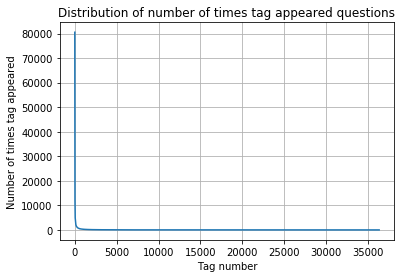

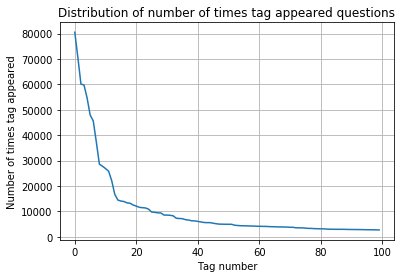

In [0]:
import matplotlib.pyplot as plt

tag_frequencies=tags_df['Frequency'].values
#print(tag_frequencies,tags_df['Frequency'])

plt.plot(tag_frequencies) #Tags are sorted..!!
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

#Very very highly skewed


plt.plot(tag_frequencies[:100])
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()


In [0]:
# """Checking if we have any duplicate titles,articles,tags rows"""

# dups=data.groupby(by=['title','article','tags']).size().to_frame(name='counts')
# dups['counts'].value_counts() #No duplicates, so we can delete the dups

# del dups

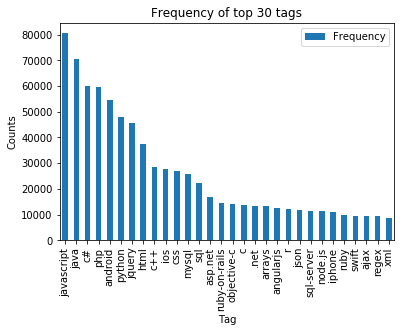

In [0]:
import numpy as np
i=np.arange(30)
tags_df.head(30).plot(kind='bar')
plt.title('Frequency of top 30 tags')
plt.xticks(i, tags_df['Tag'])
plt.xlabel('Tag')
plt.ylabel('Counts')
plt.show()

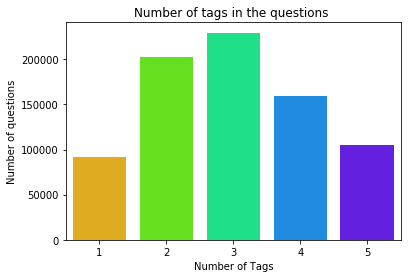

In [0]:
tag_count_per_qstn=data['tag_count'].values
import seaborn as sns
sns.countplot(tag_count_per_qstn, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

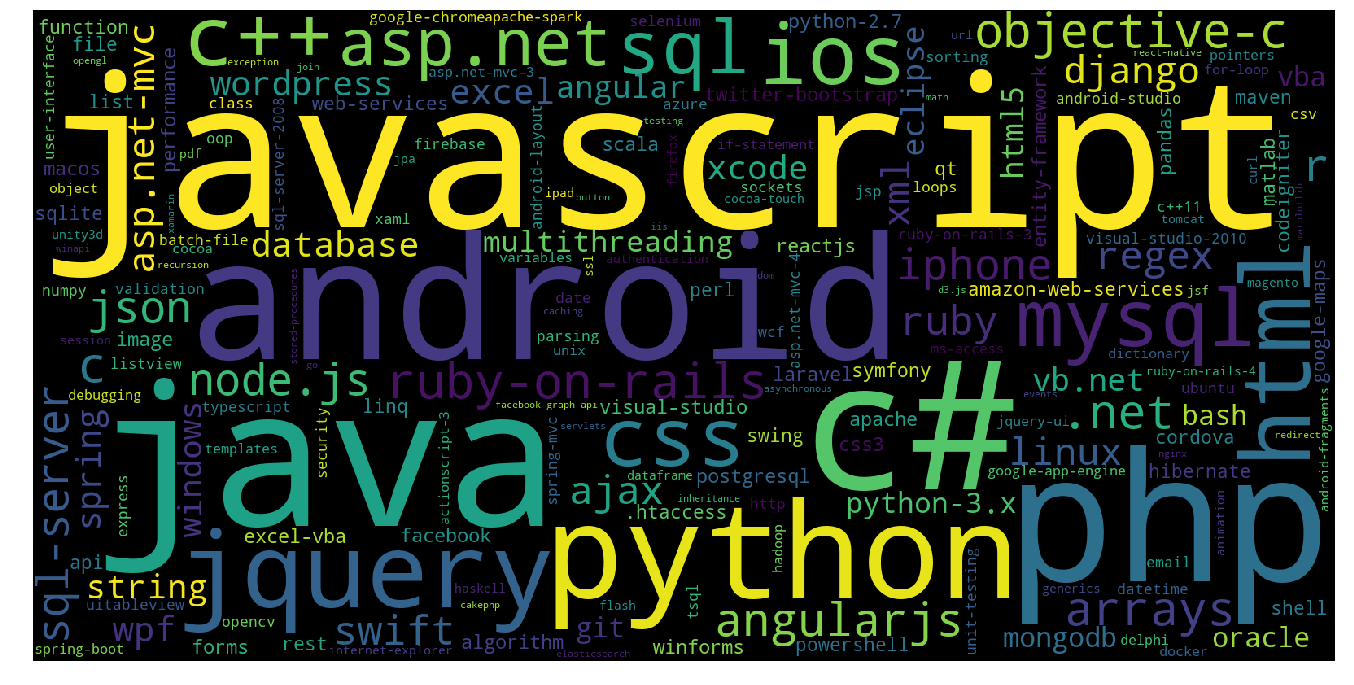

Time taken to run this cell : 0:00:05.892978


In [0]:
from datetime import datetime
from wordcloud import WordCloud

start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
#tags_freq_dict
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tags_freq_dict)

fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=5)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

In [0]:
# del tags_dtm

In [0]:
#data['tags']=data['tags'].apply(lambda x: "|".join(word for word in str(x).split('|') if not word=='nan' or ))


# tag_vectorizer=CountVectorizer(binary=True,tokenizer= lambda tags: str(tags).split('|'))

# tags_dtm=tag_vectorizer.fit_transform(data['tags'])

#pd.DataFrame(tags_dtm.toarray(),columns=tag_vectorizer.get_feature_names())

In [0]:
from nltk.stem import SnowballStemmer
"""Text Cleaning"""


def strip_html(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', str(raw_html))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer(language='english')

def extract_code(text_with_code):
    
    code = str(re.findall(r'<code>(.*?)</code>', text_with_code, flags=re.DOTALL))
    return code

def remove_code(text_with_code):
    
    text_without_code =re.sub(r'<code>(.*?)</code>',"", text_with_code, flags=re.MULTILINE|re.DOTALL)
    return text_without_code
    


def process_questions(title,article):
    
    if '<code>' in article:
        article=remove_code(article)
    article_cleaned=strip_html(article.encode('utf-8'))
    title=title.encode('utf-8')
    
    question=3*(str(title)+" ")+str(article_cleaned) #giving weigtage to title 
    question=re.sub(r'[^A-Za-z]+',' ',question) #https://stackoverflow.com/questions/2790813/regular-expression-a-za-z-or-a-za-z
    words_in_questions=word_tokenize(str(question.lower()))
    
    
    #Removing stopwords, 1 letter words except 'c'
    question_cleaned=" ".join(stemmer.stem(word) for word in words_in_questions if not word in stop_words and (len(word)!=1 or word=='c'))
    return question_cleaned




# # print(data['title'][1],'\n',data['article'][1],'\n')

# # print(process_questions(data['title'][1],data['article'][1]))

    
    
    
    
    
    
    
    

    

In [0]:
start=datetime.now()    
#https://stackoverflow.com/questions/33518124/how-to-apply-a-function-on-every-row-on-a-dataframe        
processed_data=pd.DataFrame()
processed_data['questions']=data.apply(lambda row: process_questions(row['title'], row['article']), axis=1)#https://i.stack.imgur.com/dcoE3.jpg
print("Total no. of questions processed from each title and article: ",len(processed_data['questions']))
print('Time Taken to process all the questions: ',datetime.now()-start)        
processed_data['tags']=data['tags']

processed_data.head()
processed_data.to_pickle('CleanedQuestions.pkl')

Total no. of questions processed from each title and article:  786979
Time Taken to process all the questions:  0:32:15.276357


In [0]:
"""Create Binary Tags DTM"""

vectorizer = CountVectorizer(tokenizer = lambda x: x.split('|'), binary='true')
multilabel_y = vectorizer.fit_transform(processed_data['tags'])
multilabel_y
#sorted(multilabel_y.sum(axis=0).tolist()[0],reverse=True)

<786979x36321 sparse matrix of type '<class 'numpy.int64'>'
	with 2343627 stored elements in Compressed Sparse Row format>

In [0]:
#t=multilabel_y.sum(axis=0).tolist()[0]
# print(len(t))
# sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
# print(sorted_tags_i)

# multilabel_yn=multilabel_y[:,sorted_tags_i[:500]]
# x= multilabel_yn.sum(axis=1)
# print(x)
# #np.count_nonzero(x)
# print(np.count_nonzero(x))
list(500+np.array(range(-50,450,50))*50)
list(500+np.array(range(-50,450,50))*50)

[-2000, 500, 3000, 5500, 8000, 10500, 13000, 15500, 18000, 20500]

In [0]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_not_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [0]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=data.shape[0]
for i in range(500, 5600, 1000):
    questions_explained.append(np.round(((total_qs-questions_not_explained_fn(i))/total_qs)*100,3))

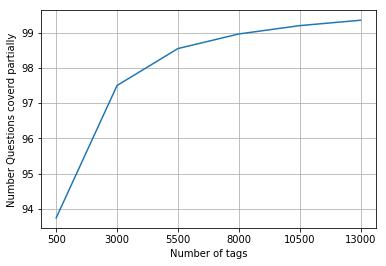

with  500 tags we are covering  93.738 % of questions
with  5500 tags we are covering  99.356 % of questions


In [0]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50 (it covers 90% of the tags)
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")
print("with ",5500,"tags we are covering ",questions_explained[-1],"% of questions")
#questions_explained

In [0]:
multilabel_yx=tags_to_choose(500) #Returns binary dtm of top 5500 frequent tags 
questions_covered=total_qs-questions_explained_fn(n=500)
print("With 500 tags, Total no. of questions covered: ",questions_covered,"from total of",total_qs," i.e., ",100*questions_covered/total_qs,"% of Questions")

With 500 tags, Total no. of questions covered:  737702 from total of 786979  i.e.,  93.73846061966076 % of Questions


In [0]:

x_train,x_test,y_train,y_test=train_test_split(processed_data,multilabel_yx,test_size=0.3,random_state =112)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.0009, max_features=50000, \
                             tokenizer = lambda x: x.split(), ngram_range=(1,3))

#norm="l2"#https://stats.stackexchange.com/questions/331926/explain-meaning-and-purpose-of-l2-normalization


x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:59:23.328487


In [0]:
x_train_multilabel

<550885x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 30846602 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score




#classifier = ClassifierChain(LogisticRegression())
#classifier = BinaryRelevance(GaussianNB())
#?OneVsRestClassifier(estimator=SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
#SGDClassifier(loss='log', alpha=0.00001, penalty='l1')


classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1) #n_jobs=-1 uses all the CPU cores (Parellel computing)
start=datetime.now()
classifier.fit(x_train_multilabel, y_train)
print('Time Taken to process train the model: ',datetime.now()-start)

predictions = classifier.predict(x_test_multilabel)

 
print("accuracy :",metrics.accuracy_score(y_test,predictions))

print("hamming loss :",metrics.hamming_loss(y_test,predictions))

""" 
predicted= 1 1 0 0 
actual=    1 0 1 0
XOR=       0 1 1 0
hamming loss = 2/4

"""



print("Micro-average quality numbers")
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))


print("Macro-average quality numbers")
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))


print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


# print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
# print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro')) 


accuracy : 0.22190737587571052
hamming loss : 0.0028593102747210856
Micro-average quality numbers
Precision: 0.7634, Recall: 0.4030, F1-measure: 0.5275
Macro-average quality numbers
Precision: 0.6002, Recall: 0.3194, F1-measure: 0.4014


C:\Users\jagad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jagad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jagad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision recall report :
              precision    recall  f1-score   support

          0       0.74      0.44      0.55     23996
          1       0.81      0.46      0.58     21154
          2       0.67      0.29      0.41     18082
          3       0.85      0.57      0.69     17795
          4       0.93      0.72      0.81     16378
          5       0.85      0.60      0.71     14309
          6       0.86      0.56      0.68     13713
          7       0.62      0.30      0.41     11087
          8       0.72      0.35      0.47      8469
          9       0.72      0.43      0.54      8440
         10       0.80      0.57      0.66      8061
         11       0.86      0.56      0.68      7703
         12       0.61      0.32      0.42      6618
         13       0.78      0.38      0.51      4921
         14       0.85      0.59      0.70      4314
         15       0.61      0.21      0.31      4287
         16       0.65      0.23      0.34      4252
         17       

In [0]:
predicted_tags=pd.DataFrame(predictions.todense())

In [0]:
predicted_tags.columns=list(tags_df['Tag'][:500]) #Since tags_df is a sorted df by Tag frequencies, returns top 5500 most frequent tags

In [0]:
# def convert_one_hot_coded_tags(predicted_df):
#     tags_predicted=[]
#     for i in range(len(predicted_df)):
#         tags="|".join(column for column in predicted_df.columns if predicted_df[column][i]==1)
#         tags_predicted.append(tags)  
#         #print(tags)
#     return tags_predicted


# predictions_df=pd.DataFrame()
# predictions_df['Tags']=pd.Series(convert_one_hot_coded_tags(predicted_tags))
# os.chdir('E:\\DSA Internship\\TagRecommendationSystem\\Final Code\\')
# predicted_tags.to_pickle(path='Predicted_Tags_Array.pkl')
# processed_data.to_pickle(path='ProcessedData.pkl')

predicted_tags

,javascript,java,c#,php,android,python,jquery,html,c++,ios,...,linked-list,three.js,jboss,transactions,notifications,camera,xamarin.ios,path,xml-parsing,shiny
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
predicted_tags_final_series=predicted_tags.apply(lambda row: "|".join(tag for tag in predicted_tags.columns if row[tag]==1),axis=1)

In [0]:
predicted_tags_df=pd.DataFrame()

predicted_tags_df['tags']=predicted_tags_final_series

#predicted_tags_df['tag_count']=predicted_tags_final.apply(lambda tags: 0 if tags=="" else len(tags.split('|')))



In [0]:
x_test.head()

,questions,tags
89459,select specif valu json decod php select speci...,php|angularjs|json|web-services|decode
60954,sum element submatric matrix sum element subma...,haskell|matrix
766425,unit test relat path caus test fail unit test ...,java|unit-testing|jenkins|nullpointerexception...
253115,configur proguard respect jackson model config...,java|android|gradle|jackson|proguard
395750,session state error url rewiit session state e...,c#|url-rewriting|web-config


In [0]:
predicted_tags_df.index=x_test.index
predicted_tags_df['Actual Tags']=x_test['tags']

predicted_tags_df.head(15)

#column - 'tags' is the predicted tags column

,tags,Actual Tags
89459,php|json,php|angularjs|json|web-services|decode
60954,r|matrix,haskell|matrix
766425,unit-testing,java|unit-testing|jenkins|nullpointerexception...
253115,,java|android|gradle|jackson|proguard
395750,,c#|url-rewriting|web-config
650751,c#,common-lisp|asdf
364662,android|xamarin|xamarin.forms,android|xamarin|xamarin.forms|visual-studio-2015
717797,ios,ios|swift
144331,javascript|jquery,jquery|datepicker|date-format
492104,ios|validation,ios|objective-c|validation|design-patterns|des...


In [0]:
# import os
# os.chdir(file_path)
predicted_tags_df.to_pickle('Predicted_Tags_frame_along_with_actual_random112_30prct_test_data.pkl') 
